* İlk olarak, Ev Fiyatları verilerini Kaggle'dan indirin.
* Ev fiyatları modelinizi tekrar çalıştırın ve F-testi, R-kare, ayarlanmış R-kare, AIC ve BIC kullanarak modelinizin uygunluğunu değerlendirin.
* Modelinizin tatmin edici olduğunu düşünüyor musunuz? Açıklayın
* Modelinizin uygunluğunu iyileştirmek için, bazı değişkenleri ekleyerek veya kaldırarak farklı model özelliklerini deneyin.
* Denediğiniz her model için, uygun metrikleri alın ve modellerinizi birbiriyle karşılaştırın. Hangi model en iyisidir ve neden?

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
ev_fiyat = pd.read_csv('./datasets/ev_fiyatlari.csv')
ev_fiyat.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
ev_fiyat_nulls = ev_fiyat.isnull().sum().to_frame('nulls')
ev_fiyat_nulls[ev_fiyat_nulls["nulls"]> 0]

,nulls
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


**Null Kayıtların Temizlenmesi:**

In [5]:
# Basement parameters
ev_fiyat.BsmtQual.fillna("NA", inplace = True)
ev_fiyat.BsmtCond.fillna("NA", inplace = True)
ev_fiyat.BsmtExposure.fillna("NA", inplace = True)
ev_fiyat.BsmtFinType1.fillna("NA", inplace = True)
ev_fiyat.BsmtFinType2.fillna("NA", inplace = True)

# Garage Parameters
ev_fiyat.GarageType.fillna("NA", inplace = True)
ev_fiyat.GarageYrBlt.fillna("NA", inplace = True)
ev_fiyat.GarageFinish.fillna("NA", inplace = True)
ev_fiyat.GarageQual.fillna("NA", inplace = True)
ev_fiyat.GarageCond.fillna("NA", inplace = True)


#LotFrontage Parameter
ev_fiyat.LotFrontage.fillna(ev_fiyat.LotFrontage.mean(), inplace = True)

#Alley Parameter
ev_fiyat.Alley.fillna("NA", inplace = True)

#MasVnrType Parameter
ev_fiyat.MasVnrType.fillna("None", inplace = True)

#MasVnrArea Parameter
ev_fiyat.MasVnrArea.fillna(0.0, inplace = True)

#Electrical Parameter
ev_fiyat.Electrical.fillna(ev_fiyat.Electrical.value_counts().index[0], inplace = True) 

#FireplaceQu Parameter
ev_fiyat.FireplaceQu.fillna("NA", inplace = True)

#PoolQC Parameter
ev_fiyat.PoolQC.fillna("NA", inplace = True)

#Fence
ev_fiyat.Fence.fillna("NA", inplace = True)

#MiscFeature
ev_fiyat.MiscFeature.fillna("NA", inplace = True)

In [6]:
del ev_fiyat['GarageYrBlt']
categorical_feature_mask = ev_fiyat.dtypes==object
categorical_cols = ev_fiyat.columns[categorical_feature_mask].tolist()

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
ev_fiyat[categorical_cols] = ev_fiyat[categorical_cols].apply(lambda col: le.fit_transform(col))
ev_fiyat[categorical_cols].head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4
5,3,1,1,0,3,0,4,0,11,2,...,1,3,5,5,2,3,2,3,8,4
6,3,1,1,3,3,0,4,0,21,2,...,1,2,5,5,2,3,4,1,8,4
7,3,1,1,0,3,0,0,0,14,4,...,1,2,5,5,2,3,4,3,8,4
8,4,1,1,3,3,0,4,0,17,0,...,5,3,1,5,2,3,4,1,8,0
9,3,1,1,3,3,0,0,0,3,0,...,1,2,2,5,2,3,4,1,8,4


In [9]:
Y = ev_fiyat['SalePrice']
X = ev_fiyat[['CentralAir','Electrical','ExterQual','Street','OverallQual', 
                  'YearRemodAdd', 'Fireplaces','TotalBsmtSF']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [  3509.99504984    395.50774001 -20820.09002268  21331.38663336
  25393.19795423    347.10120066  20659.06853358     37.7282137 ]
Sabit değer (bias): 
 -688572.7607308154


In [10]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     471.1
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:44:07   Log-Likelihood:                -17609.
No. Observations:                1460   AIC:                         3.524e+04
Df Residuals:                    1451   BIC:                         3.528e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.886e+05   1.36e+05     -5.069      0.000   -9.55e+05   -4.22e+05
CentralAir    3509.9950   4940.227      0.710      0.478   -6180.756    1.32e+04
Electrical     395.5077   1148.661      0.344      0.731   -1857.706    2648.722
ExterQual    -2.082e+04   2173.451     -9.579      0.000   -2.51e+04   -1.66e+04
Street        2.133e+04   1.74e+04      1.227      0.220   -1.28e+04    5.54e+04
OverallQual   2.539e+04   1249.241     20.327      0.000    2.29e+04    2.78e+04
YearRemodAdd   347.1012     69.447      4.998      0.000     210.873     483.329
Fireplaces    2.066e+04   1914.998     10.788      0.000    1.69e+04    2.44e+04
TotalBsmtSF     37.7282      3.071     12.284      0.000      31.703      43.753
==============================================================================
Omnibus:                      530.775   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20278.056
Skew:                           0.993   Prob(JB):                         0.00
Kurtosis:                      21.149   Cond. No.                     2.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Ev fiyatları modelinizi tekrar çalıştırın ve F-testi, R-kare, ayarlanmış R-kare, AIC ve BIC kullanarak modelinizin uygunluğunu değerlendirin.**

Çalıştırdığımız modelin R-kare değeri 0.722 ve ayarlanmış R-kare değeri 0.721 dir. ev fiyatları tahmin modelimizin harcamalardaki varyansın %72,2'lik bir oranla açıkladığı, %27.8'ü ise açıklamadan bıraktığı anlamına gelir. F testi değerine baktığımızda da bu değer 471.1 ve ilişkili p-değeri sıfıra çok yakındır. Bu, özelliklerimizin indirgenmiş modele bazı bilgiler eklediği ve modelimizin ev fiyatlarını açıklamak için yararlı olduğu anlamına gelir.

**Modelinizin tatmin edici olduğunu düşünüyor musunuz? Açıklayın**

Modelimizin ev fiyatlarını açıklamak için yaralı olduğunu fakat bazı parametere depğişiklikleri yaparak daha iyi bir model oluşturabileceğimizi düşünüyorum. 

**Modelinizin uygunluğunu iyileştirmek için, bazı değişkenleri ekleyerek veya kaldırarak farklı model özelliklerini deneyin**

Model olarak p değerleri yüksek olan (0.05 ten büyük olan) parametreleri çıkarıp farklı bir model deneyelim. (CentralAir, Electrical, Street parametrelerini çıkarıyoruz.)

In [11]:
Y = ev_fiyat['SalePrice']
X = ev_fiyat[['ExterQual','OverallQual', 
                  'YearRemodAdd', 'Fireplaces','TotalBsmtSF']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-20178.97140092  25657.22516738    369.8230829   20773.25435411
     37.94481889]
Sabit değer (bias): 
 -711228.6759159762


In [12]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     753.7
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:11:03   Log-Likelihood:                -17611.
No. Observations:                1460   AIC:                         3.523e+04
Df Residuals:                    1454   BIC:                         3.526e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.112e+05    1.3e+05     -5.491      0.000   -9.65e+05   -4.57e+05
ExterQual    -2.018e+04   2125.333     -9.494      0.000   -2.43e+04    -1.6e+04
OverallQual   2.566e+04   1235.579     20.765      0.000    2.32e+04    2.81e+04
YearRemodAdd   369.8231     65.787      5.622      0.000     240.775     498.871
Fireplaces    2.077e+04   1902.954     10.916      0.000     1.7e+04    2.45e+04
TotalBsmtSF     37.9448      3.058     12.410      0.000      31.947      43.943
==============================================================================
Omnibus:                      525.164   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20160.669
Skew:                           0.973   Prob(JB):                         0.00
Kurtosis:                      21.100   Cond. No.                     2.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p değeri yüksek olan CentralAir, Electrical, Street parameterlerini modelimizden çıkarıp tekrar model oluşturduk. Bu parameterleri çıkarmamıza rağmen R-kare ve ayarlanmış R-kare değerlerinde bir değişiklik olmadı fakat F-istatistik değerimiz 471.1 den 753.7 ye çıkmış oldu. AIC ve BIC ile yaptığımız karşılaştırmada her iki model de hemen hemen aynı değeri verdiği görülüyor.

**Model 2 de bazı parametreleri çıkarmıştık, onların yerine etki edeceğiniz düşündüğüm GrLivArea parametresini ekleyelim:**

In [13]:
Y = ev_fiyat['SalePrice']
X = ev_fiyat[['ExterQual','OverallQual', 
                  'YearRemodAdd', 'Fireplaces','TotalBsmtSF','GrLivArea']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-18598.58648752  18681.47005408    400.51767399  11692.33072401
     30.31278296     45.30483329]
Sabit değer (bias): 
 -788640.4950737257


In [14]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     824.1
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:28:33   Log-Likelihood:                -17462.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1453   BIC:                         3.497e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.886e+05   1.17e+05     -6.734      0.000   -1.02e+06   -5.59e+05
ExterQual     -1.86e+04   1922.276     -9.675      0.000   -2.24e+04   -1.48e+04
OverallQual   1.868e+04   1180.942     15.819      0.000    1.64e+04     2.1e+04
YearRemodAdd   400.5177     59.465      6.735      0.000     283.872     517.164
Fireplaces    1.169e+04   1790.974      6.528      0.000    8179.160    1.52e+04
TotalBsmtSF     30.3128      2.795     10.847      0.000      24.831      35.795
GrLivArea       45.3048      2.501     18.113      0.000      40.398      50.211
==============================================================================
Omnibus:                      612.192   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73588.347
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                      37.731   Cond. No.                     3.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Oluşturduğumuz son model sonrasında 3 modelimizin  F-testi, R-kare, ayarlanmış R-kare, AIC ve BIC değerleri:**

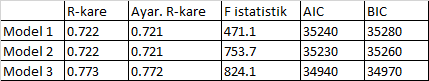

Oluşturduğumuz son Model 3 te GrLivArea parametresini eklememizle beraber R-kare değerimiz 0.722 den 0.773'e çıkmış görünüyor. F-istatistik değerimiz de 824.1 değeriyle diğer modellerden daha büyk bir değer almış durumda. AIC ve BIC değerlerini kontrol ettiğimizde de Model 3'ün değeri diğer modellerden daha düşük değerde olduğu görülüyor. Bu değerleri göz önüne aldığımızda Model 3'ün Model 1 ve 2 den daha iyi olduğunu söyleyebiliriz.